In [2]:
import pandas as pd
import re
import spacy
import numpy as np
from scipy import sparse

In [3]:
X = sparse.load_npz('Xtrain_matrix.npz')
y = pd.read_csv('ytrain.csv')


# Découpage des données
On n'a pas de y_test avec le x_test fournit, on découpe alors notre x_train pour obtenir un échantillon de validation

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
print("shape of X_train :")
print(X_train.shape)
print("shape of X_test :")
print(X_test.shape)
print("shape of y_train :")
print(y_train.shape)
print("shape of y_test :")
print(y_test.shape)

shape of X_train :
(67932, 160403)
shape of X_test :
(16984, 160403)
shape of y_train :
(67932, 2)
shape of y_test :
(16984, 2)


# Modèle

In [6]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(multi_class='multinomial',class_weight= "balanced", max_iter=1000)
clf.fit(X_train, y_train['prdtypecode'])


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [7]:
y_pred = clf.predict(X_test)

y_pred = pd.DataFrame(y_pred, columns=['prdtypecode'])

#  Classe classification_report pour afficher les résultats 
from sklearn.metrics import classification_report

result = classification_report(y_test['prdtypecode'], y_pred)
print("Classification report :")
print(result)

print("Score : "+str(clf.score(X_test, y_test['prdtypecode'])))

Classification report :
              precision    recall  f1-score   support

           0       0.42      0.71      0.53       641
           1       0.73      0.59      0.65       503
           2       0.76      0.82      0.79       317
           3       0.96      0.84      0.90       185
           4       0.73      0.80      0.76       533
           5       0.93      0.90      0.92       803
           6       0.57      0.66      0.61       155
           7       0.72      0.50      0.59       966
           8       0.56      0.59      0.58       397
           9       0.86      0.89      0.88      1010
          10       0.97      0.91      0.94       169
          11       0.77      0.76      0.76       533
          12       0.80      0.74      0.77       627
          13       0.84      0.76      0.80       991
          14       0.88      0.90      0.89       842
          15       0.75      0.92      0.82       179
          16       0.79      0.73      0.76       976
   

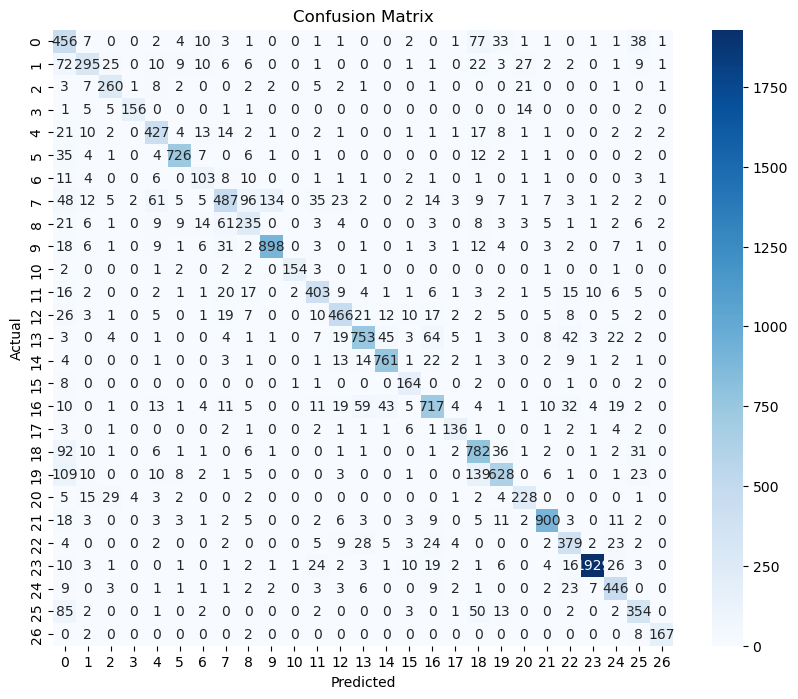

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
result = confusion_matrix(y_test['prdtypecode'], y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(result, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Save the confusion matrix as an image
plt.savefig('confusion_matrix.png')
plt.show()

